# Import iniziali

In [ ]:
!git clone https://github.com/nianlonggu/MemSum.git

Cloning into 'MemSum'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 407 (delta 74), reused 74 (delta 74), pack-reused 323
Receiving objects: 100% (407/407), 82.41 MiB | 22.61 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [ ]:
!pip install torch torchvision -U

In [ ]:
import torch

print(torch.__version__)

2.1.0+cu118


In [ ]:
pip install -r /content/MemSum/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 45.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.9/377.9 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s e

In [ ]:
import pandas as pd


# Download 3 Main Pretrained Model Checkpoints

In [ ]:
import os
import subprocess
import wget

for dataset_name in [ "arxiv", "pubmed", "gov-report"]:
#for dataset_name in ["pubmed"]:
    print(dataset_name)
    os.makedirs( "data/"+dataset_name, exist_ok=True )

arxiv
pubmed
gov-report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd

/root


In [ ]:
cd /content/

/content


**Download Pretrained Model Checkpoints**

The trained MemSum model checkpoints are stored on huggingface hub

In [ ]:
from huggingface_hub import snapshot_download
## download the pretrained glove word embedding (200 dimension)
snapshot_download('nianlong/memsum-word-embedding', local_dir = "model/word_embedding" )

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

'/content/model/word_embedding'

In [ ]:
## download model checkpoint on the arXiv dataset
snapshot_download('nianlong/memsum-arxiv', local_dir = "model/memsum-arxiv" )

## download model checkpoint on the PubMed dataset
snapshot_download('nianlong/memsum-pubmed', local_dir = "model/memsum-pubmed" )

## download model checkpoint on the Gov-Report dataset
snapshot_download('nianlong/memsum-gov-report', local_dir = "model/memsum-gov-report" )

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

'/content/model/memsum-gov-report'

locale

In [ ]:
import json

In [ ]:
import pandas as pd

In [ ]:
test_corpus_arxiv = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/arxiv/test.jsonl") ]
test_corpus_pubmed = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/pubmed/test.jsonl") ]
test_corpus_gov_report = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/gov_report/test.jsonl") ]

In [ ]:
cd /content/MemSum

/content/MemSum


In [ ]:
from src.summarizer import MemSum
from tqdm import tqdm
from rouge_score import rouge_scorer
import json
import numpy as np

In [ ]:
def evaluate( model, corpus, p_stop, max_extracted_sentences, rouge_cal ):
    scores = []
    for data in tqdm(corpus):
        gold_summary = data["summary"]
        extracted_summary = model.extract( [data["text"]], p_stop_thres = p_stop, max_extracted_sentences_per_document = max_extracted_sentences )[0]

        score = rouge_cal.score( "\n".join( gold_summary ), "\n".join(extracted_summary)  )
        scores.append( [score["rouge1"].fmeasure, score["rouge2"].fmeasure, score["rougeLsum"].fmeasure ] )

    return np.asarray(scores).mean(axis = 0)

In [ ]:

memsum_arxiv = MemSum(  "/content/model/memsum-arxiv/model.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

memsum_pubmed = MemSum(  "/content/model/memsum-pubmed/model.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

memsum_gov_report = MemSum(  "/content/model/memsum-gov-report/model.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

# Pipeline

Estraggo top sentences con memsum e chiedo a gpt di creare un riassunto verboso e astratto da queste.

In [ ]:
pip install openai

In [ ]:
import openai

#openai.api_key = "sk-"

def generate_verbose_summary(extracted_sentences, max_tokens):

  input_text = " ".join(extracted_sentences)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following sentences in a verbose and abstract manner:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()


def custom_pipeline(input_text, extractive_model, extracted_sentences, max_tokens_gpt):
    extracted_summary = extractive_model.extract( [input_text] ,
                                      p_stop_thres = 0.6,
                                      max_extracted_sentences_per_document = extracted_sentences
                                      )[0]
    verbose_summary = generate_verbose_summary(extracted_summary, max_tokens_gpt)

    return extracted_summary,verbose_summary


# **EUR_LEX_SUM**

In [ ]:
memsum_eurlexsum = MemSum(  "/content/drive/MyDrive/checkpoints/eur_lex_sum/model_batch_620.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

In [ ]:
test = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/eur_lex_sum/fulltest188.json") ]


In [ ]:
test[0]

{'text': ['12.7.2019\nEN\nOfficial Journal of the European Union\nL 188/55\nREGULATION (EU) 2019/1156 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL\nof 20 June 2019\non facilitating cross-border distribution of collective investment undertakings and amending Regulations (EU) No 345/2013, (EU) No 346/2013 and (EU) No 1286/2014\n(Text with EEA relevance)\nTHE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION,\nHaving regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof,\nHaving regard to the proposal from the European Commission,\nAfter transmission of the draft legislative act to the national parliaments,\nHaving regard to the opinion of the European Economic and Social Committee (1),\nActing in accordance with the ordinary legislative procedure (2),\nWhereas:\n(1)\nDivergent regulatory and supervisory approaches concerning the cross-border distribution of alternative investment funds (AIFs) as defined in Directive 2011/61/EU of th

In [ ]:
extSum,gptSum=custom_pipeline(test[0]['text'], memsum_eurlexsum, 28,700)

In [ ]:
extSum

['12.7.2019\nEN\nOfficial Journal of the European Union\nL 188/55\nREGULATION (EU) 2019/1156 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL\nof 20 June 2019\non facilitating cross-border distribution of collective investment undertakings and amending Regulations (EU) No 345/2013, (EU) No 346/2013 and (EU) No 1286/2014\n(Text with EEA relevance)\nTHE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION,\nHaving regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof,\nHaving regard to the proposal from the European Commission,\nAfter transmission of the draft legislative act to the national parliaments,\nHaving regard to the opinion of the European Economic and Social Committee (1),\nActing in accordance with the ordinary legislative procedure (2),\nWhereas:\n(1)\nDivergent regulatory and supervisory approaches concerning the cross-border distribution of alternative investment funds (AIFs) as defined in Directive 2011/61/EU of the Europea

In [ ]:
gptSum

'The European Parliament and Council have issued Regulation (EU) 2019/1156, which aims to facilitate cross-border distribution of collective investment undertakings and make amendments to existing regulations. The current divergent regulatory and supervisory approaches regarding cross-border distribution of alternative investment funds and undertakings for collective investment in transferable securities result in fragmentation and barriers to cross-border marketing. This regulation seeks to address these issues and ensure that collective investment undertakings can be marketed in other Member States. It also includes provisions that apply to UCITS management companies and companies that manage UCITS. To ensure legal certainty, the application dates of national laws implementing this regulation should be synchronized with the application dates of Directive (EU) 2019/1160. Additionally, marketing communications for AIFs and UCITS should clearly identify the risks and rewards of investin

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (DIVISO IN 11 PARTI OTTENENDO SUMMARY DA 250 E INFINE SUMMARY FINALE)**

In [ ]:
resFinale

"The document is a regulation that aims to facilitate the cross-border distribution of collective investment undertakings, such as alternative investment funds (AIFs) and undertakings for collective investment in transferable securities (UCITS). The regulation introduces requirements for marketing communications addressed to investors, including the need for transparency and clear information on risks and rewards. Competent authorities are required to publish national laws and regulations applicable to marketing communications, and ESMA is tasked with creating a central database containing summaries of these requirements. The regulation also addresses fees and charges levied by competent authorities, requiring them to be proportionate and transparent. ESMA's existing databases will be expanded to include a notification portal for cross-border distribution of investment funds. The document also includes provisions on pre-marketing for venture capital funds and social entrepreneurship fu

In [ ]:
input_text = " ".join(test[0]['text'])
len(input_text)

45934

Rilanciando il codice darà errore perchè in data 7 Nov è stato cambiato in v1.0
funzionante con openai==v0.28.1
https://github.com/langchain-ai/langchain/issues/12967

In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 250 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(3)
  return res

In [ ]:
res=gen_abs_summary(test[0]['text'], 250)

salvo res in cui ho 11 summary del documento da 250 words l'uno

In [ ]:
import pickle

with open('/content/drive/MyDrive/checkpoints/eur_lex_sum/summaryParzialiGPT.pkl', 'wb') as file:
    pickle.dump(res, file)


In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 300 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 350)

**COSA NE PENSA GPT?**

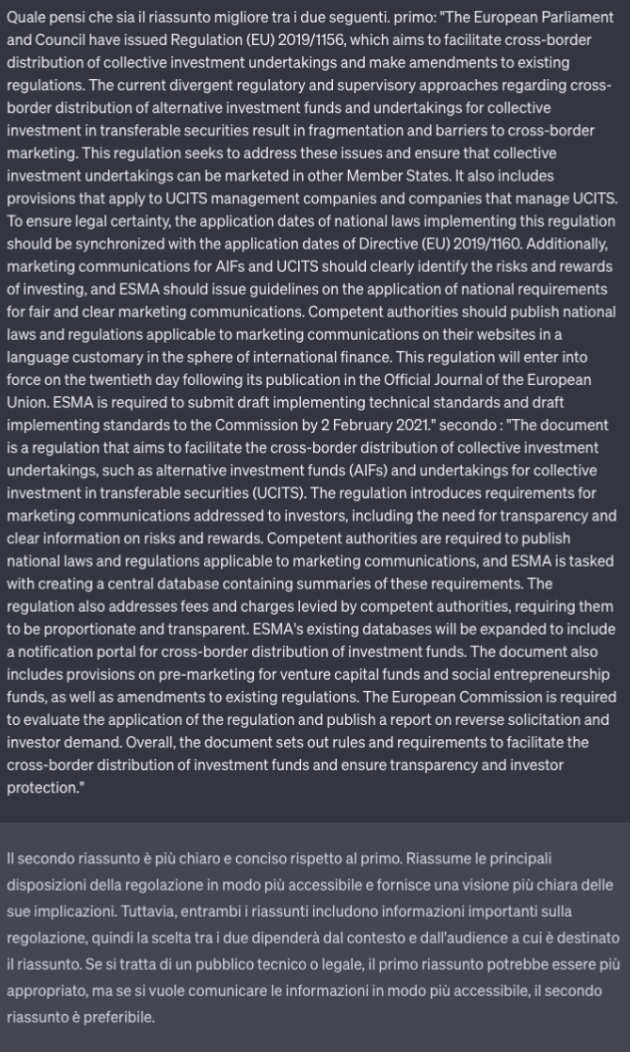

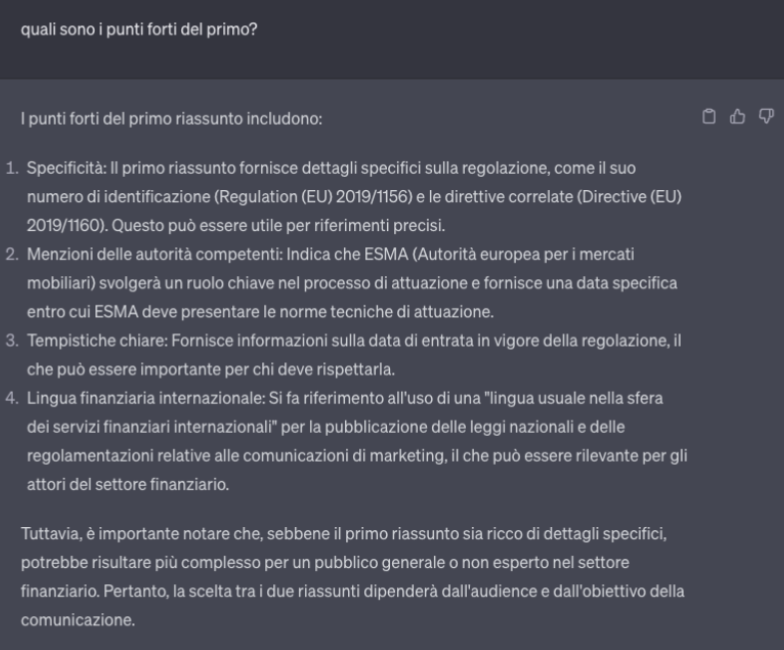

# **PUBMED**

In [ ]:
extSum,gptSum=custom_pipeline(test_corpus_pubmed[0]['text'], memsum_pubmed, 10, 350)

In [ ]:
test_corpus_pubmed[0]['text']

["anxiety affects quality of life in those living with parkinson 's disease ( pd ) more so than overall cognitive status , motor deficits , apathy , and depression [ 13 ] .",
 'although anxiety and depression are often related and coexist in pd patients , recent research suggests that anxiety rather than depression is the most prominent and prevalent mood disorder in pd [ 5 , 6 ] . yet ,',
 'our current understanding of anxiety and its impact on cognition in pd , as well as its neural basis and best treatment practices , remains meager and lags far behind that of depression .',
 'overall , neuropsychiatric symptoms in pd have been shown to be negatively associated with cognitive performance .',
 'for example , higher depression scores have been correlated with lower scores on the mini - mental state exam ( mmse ) [ 8 , 9 ] as well as tests of memory and executive functions ( e.g. , attention ) [ 1014 ] .',
 'likewise , apathy and anhedonia in pd patients have been associated with execu

Sentences estratte da MemSum

In [ ]:
extSum

['more specifically , we found that pd patients with anxiety were more impaired on the trail making test part b which assessed attentional set - shifting , on both digit span tests which assessed working memory and attention , and to a lesser extent on the logical memory test which assessed memory and new verbal learning compared to pd patients without anxiety . taken together ,',
 'this study is the first to directly compare cognition between pd patients with and without anxiety .',
 'results from this study showed selective verbal memory deficits in rpd patients with anxiety compared to rpd without anxiety , whereas lpd patients with anxiety had greater attentional / working memory deficits compared to lpd without anxiety .',
 'given that research on healthy young adults suggests that anxiety reduces processing capacity and impairs processing efficiency , especially in the central executive and attentional systems of working memory [ 26 , 27 ] , we hypothesized that pd patients with 

Summary Finale GPT

In [ ]:
gptSum

"The aim of this study was to investigate the cognitive differences between Parkinson's disease (PD) patients with anxiety and those without anxiety. The researchers found that PD patients with anxiety showed greater impairments in attentional set-shifting, working memory, and to a lesser extent, verbal memory and new verbal learning compared to PD patients without anxiety. This study is the first of its kind to directly compare cognition in PD patients with and without anxiety. The results revealed that PD patients with anxiety had selective verbal memory deficits, while those with anxiety on the left side of the brain had greater attentional and working memory deficits. The researchers hypothesized that anxiety would negatively impact attentional set-shifting and working memory in PD patients, based on previous research indicating that anxiety reduces processing capacity and efficiency in the central executive and attentional systems of working memory. The findings of this study conf

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

"This document discusses the impact of anxiety on individuals living with Parkinson's disease (PD). It states that anxiety has a greater effect on quality of life in PD patients than cognitive status, motor deficits, apathy, and depression. While anxiety and depression often coexist in PD patients, recent research suggests that anxiety is the most prevalent mood disorder in PD. However, the understanding of anxiety and its effects on cognition in PD, as well as its neural basis and treatment practices, is limited compared to depression.\n\nThe study included 17 PD patients with anxiety and 33 PD patients without anxiety, and the data was collected through self-reported questionnaires and cognitive assessments. The results showed that PD patients with anxiety performed worse on tests that assessed attentional set-shifting, working memory, and memory compared to PD patients without anxiety. This suggests that anxiety in PD may reduce processing capacity and impair processing efficiency i

In [ ]:
pip install openai==v0.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
input_text = " ".join(test_corpus_pubmed[0]['text'])
len(input_text)

17759

In [ ]:
import openai
import time

def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 250 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(3)
  return res

In [ ]:
res=gen_abs_summary(test_corpus_pubmed[0]['text'], 250)

In [ ]:
import pickle

with open('/content/drive/MyDrive/checkpoints/pub_med/summaryParzialiGPT.pkl', 'wb') as file:
    pickle.dump(res, file)


In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 180 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 250)

**Cosa ne pensa GPT dei due summary?**


- Quale pensi che sia il riassunto migliore tra i due seguenti. [..]
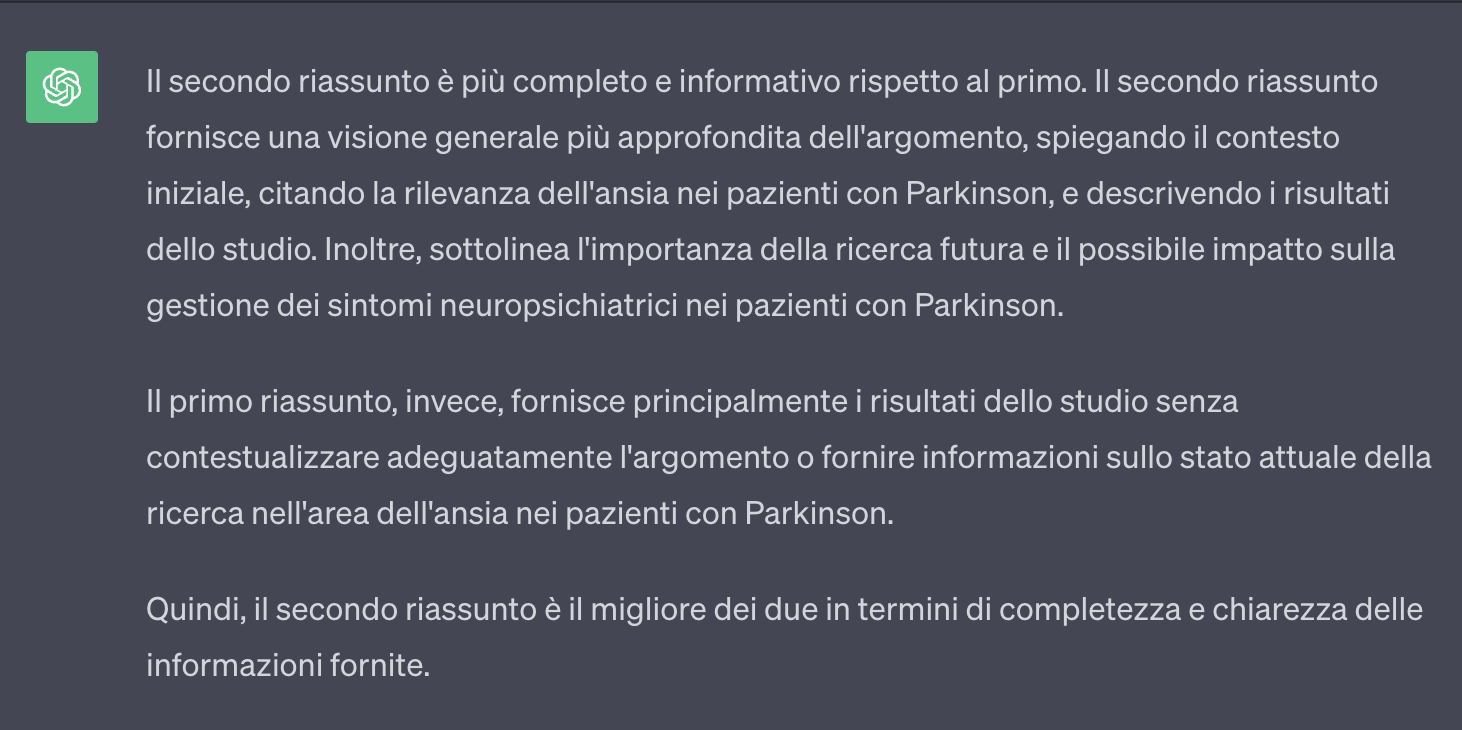

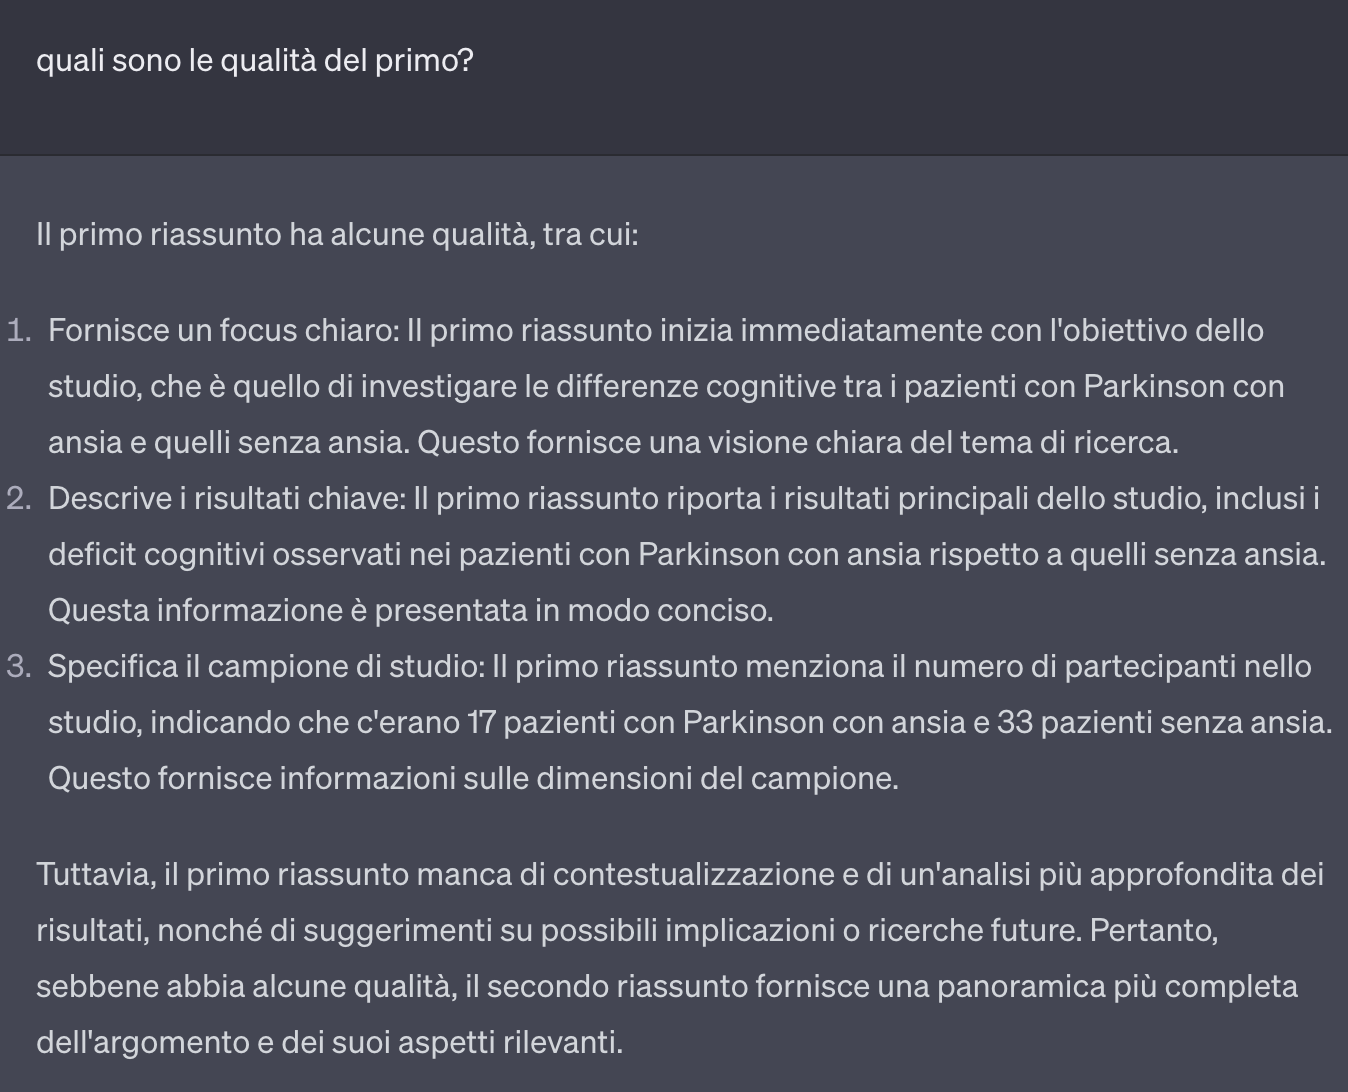

# **ARXIV**

In [ ]:
extSum,gptSum=custom_pipeline(test_corpus_arxiv[0]['text'], memsum_arxiv, 10,350)

In [ ]:
len(test_corpus_arxiv[0]['text'])

220

In [ ]:
test_corpus_arxiv[0]['text']

['for about 20 years the problem of properties of short - term changes of solar activity has been considered extensively .',
 'many investigators studied the short - term periodicities of the various indices of solar activity .',
 'several periodicities were detected , but the periodicities about 155 days and from the interval of @xmath3 $ ] days ( @xmath4 $ ] years ) are mentioned most often .',
 'first of them was discovered by @xcite in the occurence rate of gamma - ray flares detected by the gamma - ray spectrometer aboard the _ solar maximum mission ( smm ) .',
 'this periodicity was confirmed for other solar flares data and for the same time period @xcite .',
 'it was also found in proton flares during solar cycles 19 and 20 @xcite , but it was not found in the solar flares data during solar cycles 22 @xcite .',
 '_    several autors confirmed above results for the daily sunspot area data . @xcite studied the sunspot data from 18741984 .',
 'she found the 155-day periodicity in d

In [ ]:
extSum

['2 .   two effects cause the existence of the peak of the periodogram of the time series of sunspot area fluctuations at about @xmath0 days : the first is caused by the 27-day periodicity , which probably creates the 162-day periodicity ( it is a subharmonic frequency of the 27-day periodicity ) and the second is caused by statistically significant positive values of the autocorrelation function from the intervals of @xmath165 $ ] and @xmath166 $ ] days .',
 'the autocorrelation analysis of the time series of sunspot area fluctuations from the southern hemisphere indicates that the periodicity of about 155 days exists during the maximum activity period .',
 'the existence of the periodicity of about @xmath0 days of the time series of sunspot area fluctuations and sunspot area fluctuations from the northern hemisphere during the maximum activity period is questionable .',
 'is presented . in section 4 numerical results of the new method of the diagnosis of an echo - effect for sunspot 

In [ ]:
gptSum

'The presence of a peak in the periodogram of sunspot area fluctuations at approximately x days is attributed to two underlying factors. Firstly, there is a 27-day periodicity that likely gives rise to a subharmonic frequency of 162 days. Secondly, the autocorrelation function reveals statistically significant positive values within the intervals of x-165 to x-166 days. The analysis of sunspot area fluctuations in the southern hemisphere indicates the existence of a periodicity of about 155 days during periods of maximum activity. However, the presence of a periodicity of approximately x days in the time series of sunspot area fluctuations and sunspot area fluctuations from the northern hemisphere during the maximum activity period is uncertain. Section 4 discusses the numerical results of a new diagnostic method for assessing echo-effects in sunspot area data, while section 5 considers the problem of the periodicity of about 155 days during the maximum activity period for sunspot data

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

'The document discusses the analysis of solar activity data, specifically focusing on the periodicities observed in sunspot numbers and other solar parameters. Various periodicities, such as the 155-day and 100-200 day periodicities, have been detected in different data sets and methods.\n\nThe document also discusses the challenges in interpreting significant peaks in the power spectrum analysis, such as sampling effects, echo effects, long-term periodicities, and random noise. It suggests methods to reduce these effects and improve the accuracy of peak identification.\n\nAdditionally, the document introduces a method for detecting long-term periodicities and echo effects in time series data using periodograms and autocorrelation functions. It describes the calculation of power spectrum estimators and the establishment of appropriate indexes to quantify the contributions of positive and negative values of the autocorrelation function.\n\nThe document presents the analysis of sunspot a

In [ ]:
input_text = " ".join(test_corpus_arxiv[0]['text'])
len(input_text)

32828

In [ ]:
import openai
import time

def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 250 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(3)
  return res

In [ ]:
res=gen_abs_summary(test_corpus_arxiv[0]['text'], 250)

In [ ]:
import pickle

with open('/content/drive/MyDrive/checkpoints/arxiv/summaryParzialiGPT.pkl', 'wb') as file:
    pickle.dump(res, file)


In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 250 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 300)

**Cosa ne pensa GPT dei due summary?**


"Quale pensi che sia il riassunto migliore tra i due seguenti."

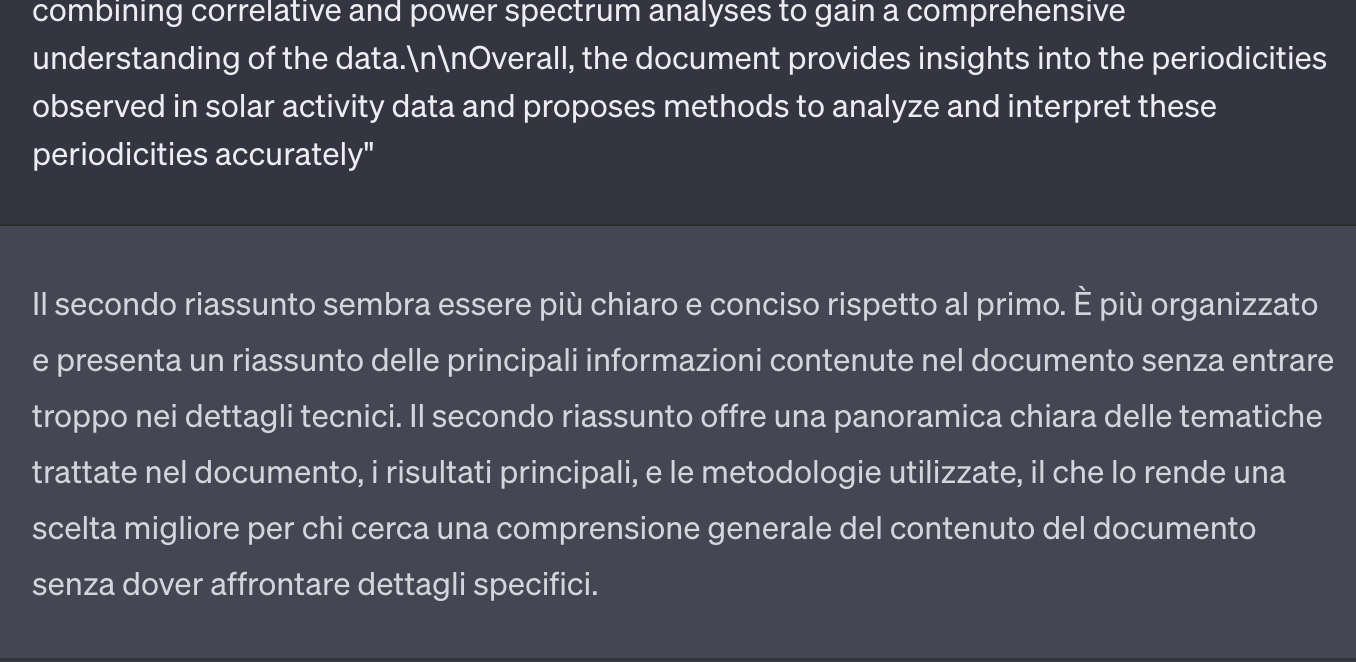

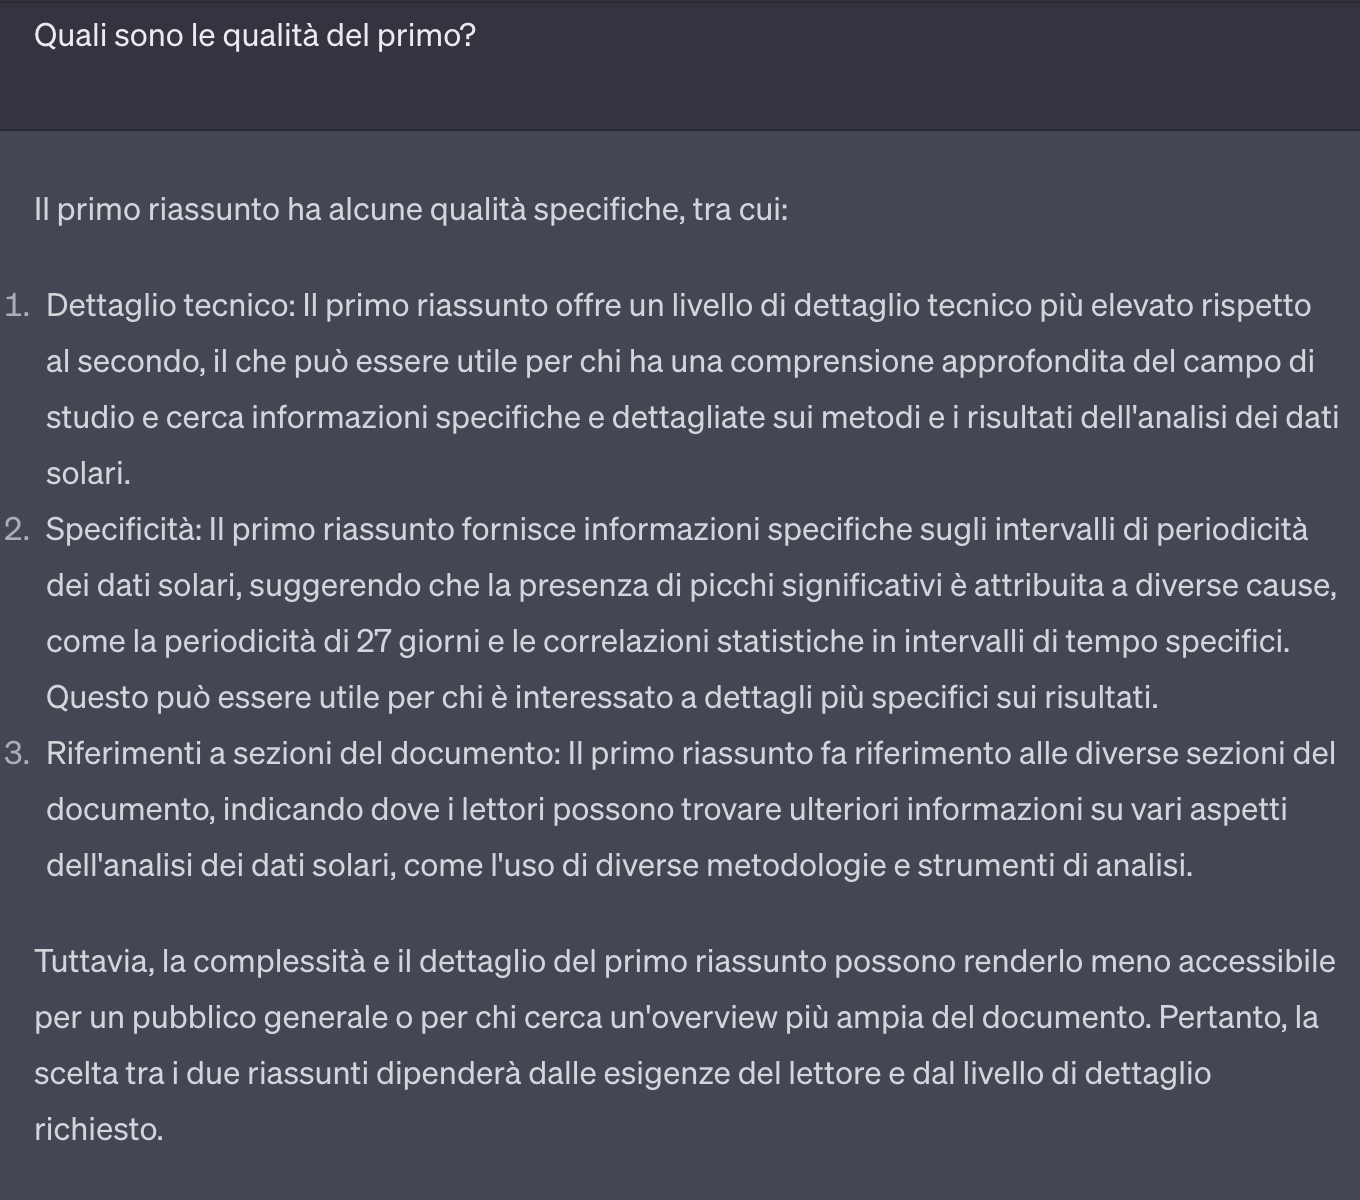

# **GOVREPORT**

In [ ]:
extSum,gptSum=custom_pipeline(test_corpus_gov_report[0]['text'], memsum_gov_report, 18,700)

In [ ]:
test_corpus_gov_report[0]['text']

['The sale of U.S-origin armaments and other "defense articles " has been a part of national security policy since at least the Lend-Lease programs in the lead-up to U.S. involvement in World War II.',
 'Historically, Presidents have used sales of defense articles and services to foreign governments and organizations to further broad foreign policy goals, ranging from sales to strategically important countries during the Cold War, to building global counterterrorism capacity following the terrorist attacks of September 11, 2001.',
 'The sale of U.S. defense articles to foreign countries is governed by a broad set of statutes, public laws, federal regulations, and executive branch policies, along with international agreements.',
 'An interconnected body of legislative provisions, authorizations, and reporting requirements related to the transfer of U.S. defense articles appears in both the National Defense Authorization Acts (NDAA) and in the State Department, Foreign Operations, and Re

In [ ]:
extSum

['The sale of U.S-origin armaments and other "defense articles " has been a part of national security policy since at least the Lend-Lease programs in the lead-up to U.S. involvement in World War II.',
 'This report describes the major statutory provisions governing the sale and export of defense articlesâ\x80\x94Foreign Military Sales (FMS) and Direct Commercial Sales (DCS)â\x80\x94and outlines the process through which those sales and exports are made.',
 'An interconnected body of legislative provisions, authorizations, and reporting requirements related to the transfer of U.S. defense articles appears in both the National Defense Authorization Acts (NDAA) and in the State Department, Foreign Operations, and Related Programs (SFOPS) Appropriations Acts.',
 'The sale of U.S. defense articles to foreign countries is governed by a broad set of statutes, public laws, federal regulations, and executive branch policies, along with international agreements.',
 'The report also provides a s

In [ ]:
gptSum

'The sale and export of defense articles, including armaments, has long been a crucial component of U.S. national security policy. This report examines the key legal provisions governing these sales, specifically the Foreign Military Sales (FMS) and Direct Commercial Sales (DCS) processes. The transfer of U.S. defense articles to foreign countries is subject to a comprehensive framework of statutes, public laws, regulations, and executive branch policies, as well as international agreements. The report highlights specific limitations on arms sales and requirements for monitoring their use, as outlined in the Arms Export Control Act. Throughout history, U.S. Presidents have utilized defense article sales to advance foreign policy objectives, such as aiding strategically significant nations during the Cold War or building global counterterrorism capabilities after 9/11. The report notes that future updates will explore policy implications and concerns for Congress. The Department of Stat

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

'The document provides an overview of the statutory provisions governing the sale and export of defense articles by the United States to foreign countries. It discusses the Foreign Assistance Act of 1961 and the Arms Export Control Act of 1976, which outline the process for Foreign Military Sales (FMS) and Direct Commercial Sales (DCS). FMS involves the U.S. government acting as a broker to procure defense articles for sales to certain foreign countries and organizations, while DCS does not involve the government as a broker but still requires licensing. The President designates what items are considered defense articles and subject to licensing. All individuals and entities engaged in manufacturing, brokering, exporting, or importing defense articles and services must register with the State Department, and the State Department must notify Congress prior to planned FMS and DCS cases.\n\nThe document also mentions legislative limitations on arms sales and end-use restrictions based on 

In [ ]:
input_text = " ".join(test_corpus_gov_report[0]['text'])
len(input_text)

58928

In [ ]:
import openai
import time

def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 250 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(3)
  return res

In [ ]:
res=gen_abs_summary(test_corpus_gov_report[0]['text'], 250)

In [ ]:
import pickle

with open('/content/drive/MyDrive/checkpoints/govreport/summaryParzialiGPT.pkl', 'wb') as file:
    pickle.dump(res, file)


In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 200 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 250)

**Cosa ne pensa GPT dei due summary?**


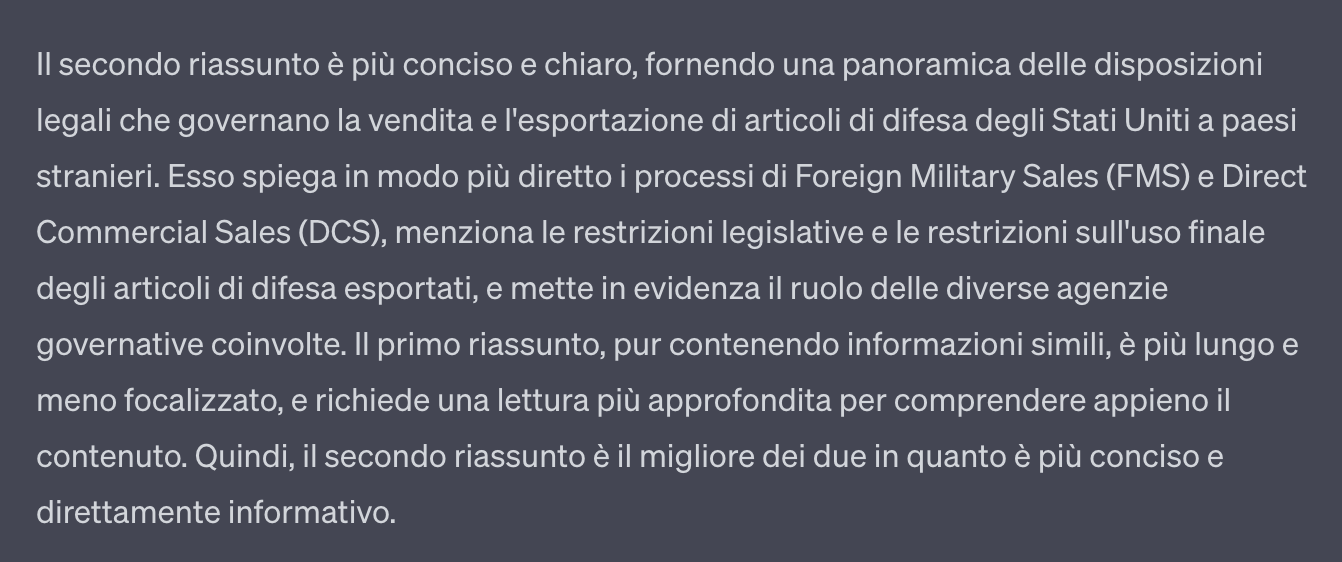

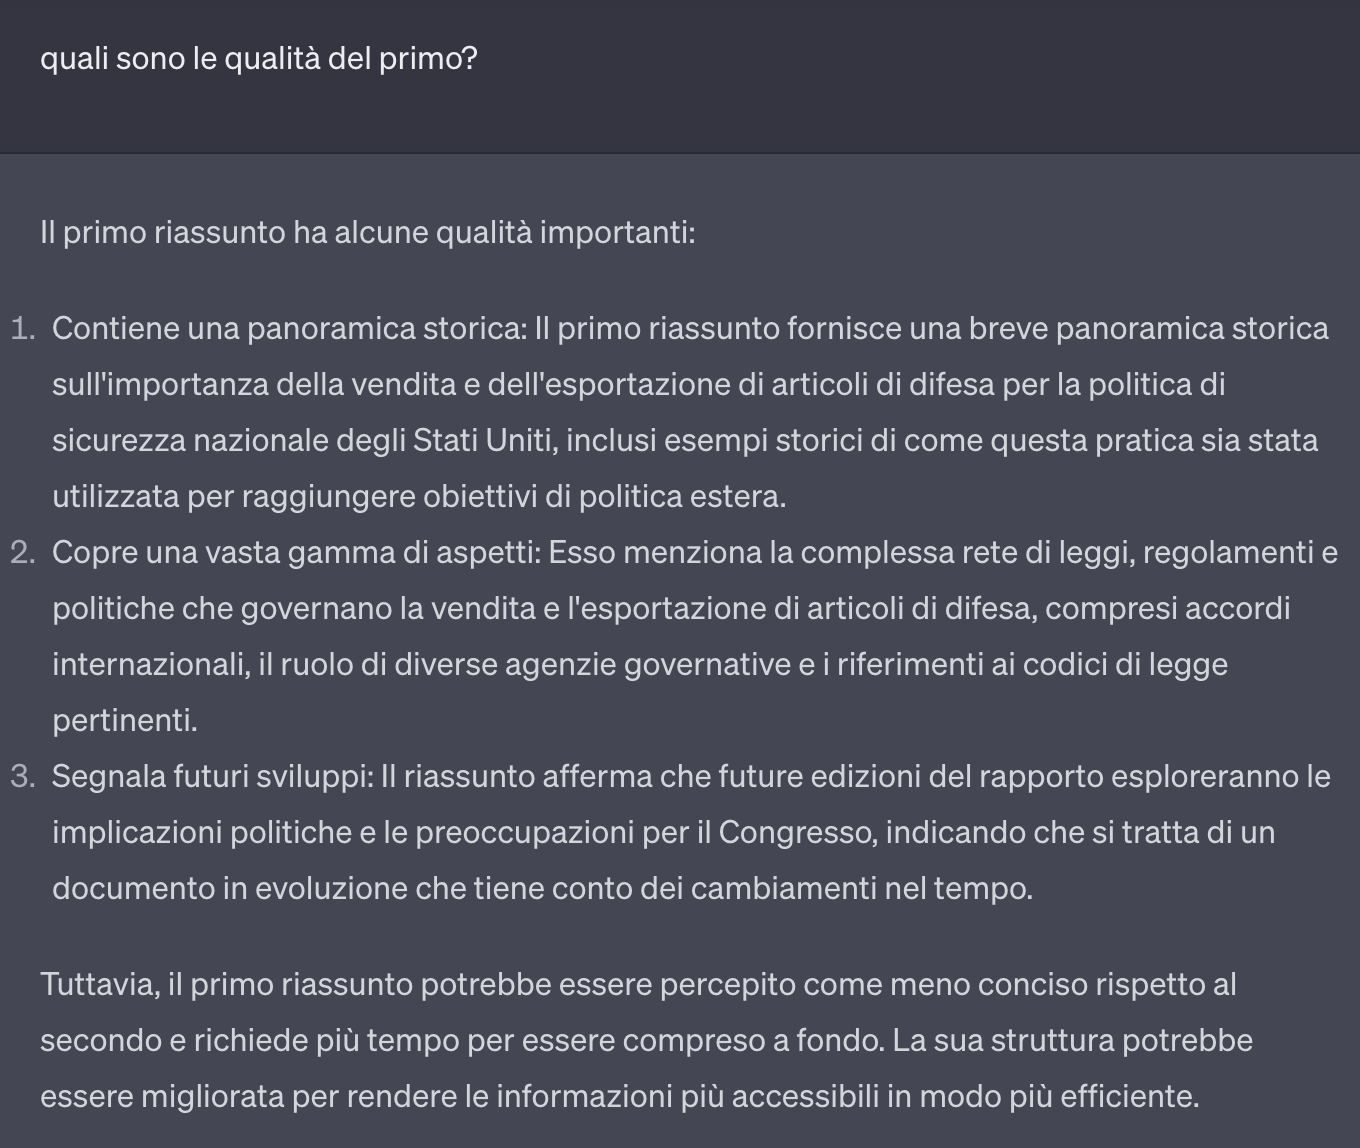

# **ELIFE**

In [ ]:
memsum_elife = MemSum(  "/content/drive/MyDrive/checkpoints/e_life/model_batch_620.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

In [ ]:
test = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/e_life/test300.json") ]

In [ ]:
test[0]

{'text': ['As countries in the Greater Mekong Sub-region ( GMS ) increasingly focus their malaria control and elimination efforts on reducing forest-related transmission , greater understanding of the relationship between deforestation and malaria incidence will be essential for programs to assess and meet their 2030 elimination goals .',
  'Leveraging village-level health facility surveillance data and forest cover data in a spatio-temporal modeling framework , we found evidence that deforestation is associated with short-term increases , but long-term decreases confirmed malaria case incidence in Lao People’s Democratic Republic ( Lao PDR ) .',
  'We identified strong associations with deforestation measured within 30 km of villages but not with deforestation in the near ( 10 km ) and immediate ( 1 km ) vicinity .',
  'Results appear driven by deforestation in densely forested areas and were more pronounced for infections with Plasmodium falciparum ( P .',
  'falciparum ) than for Pl

In [ ]:
extSum,gptSum=custom_pipeline(test[0]['text'], memsum_elife, 20,500)

In [ ]:
extSum

['As countries in the Greater Mekong Sub-region ( GMS ) increasingly focus their malaria control and elimination efforts on reducing forest-related transmission , greater understanding of the relationship between deforestation and malaria incidence will be essential for programs to assess and meet their 2030 elimination goals .',
 'Research to track and analyse micro-scale movements of forest-goers is needed to understand how they interact with the forest and where are the foci of infection .',
 ', 2006 ) , most likely because of very different underlying human processes .',
 'We argue that this is indicative of the existence of a key high-risk group linking the deforestation patterns identified to malaria in the villages , namely a forest-going population .',
 'Last , the village-level geo-referencing of malaria registries ignores the possibility that patients may become infected elsewhere .',
 'Leveraging village-level health facility surveillance data and forest cover data in a spat

In [ ]:
gptSum

'The focus of malaria control and elimination efforts in the Greater Mekong Sub-region (GMS) is shifting towards reducing forest-related transmission. To achieve their 2030 elimination goals, it is crucial for programs to understand the relationship between deforestation and malaria incidence. Research is needed to track and analyze the movements of people who visit forests to determine how they interact with the environment and identify areas of infection. Previous studies have shown a link between deforestation patterns and malaria in villages, particularly among the forest-going population. However, recent work has challenged this hypothesis and found that older settlements also have high malaria incidence. This suggests that forest activities play a significant role in malaria transmission in the GMS. The study conducted in Lao People’s Democratic Republic found evidence that deforestation is associated with short-term increases but long-term decreases in malaria cases. This study 

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

'The document discusses a study conducted in the Greater Mekong Subregion (GMS) that aimed to understand the relationship between deforestation and malaria incidence. The study used village-level health facility surveillance data and forest cover data to analyze the spatio-temporal associations between deforestation and malaria cases in Lao PDR.\n\nThe study found that deforestation within 30 km of villages was associated with short-term increases but long-term decreases in malaria cases. The associations were stronger in densely forested areas and more pronounced for infections with Plasmodium falciparum than for Plasmodium vivax. The results supported the "frontier malaria" hypothesis, which suggests that deforestation initially increases malaria transmission but eventually leads to reduced transmission.\n\nThe authors emphasized the importance of understanding the relationship between deforestation and malaria for achieving the 2030 elimination goals in the GMS. They recommended int

In [ ]:
input_text = " ".join(test[0]['text'])

In [ ]:
len(input_text)

27547

In [ ]:
import time

def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 400 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(5)
  return res

In [ ]:
res=gen_abs_summary(test[0]['text'], 400)

In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 350 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 400)

**COSA NE PENSA GPT?**

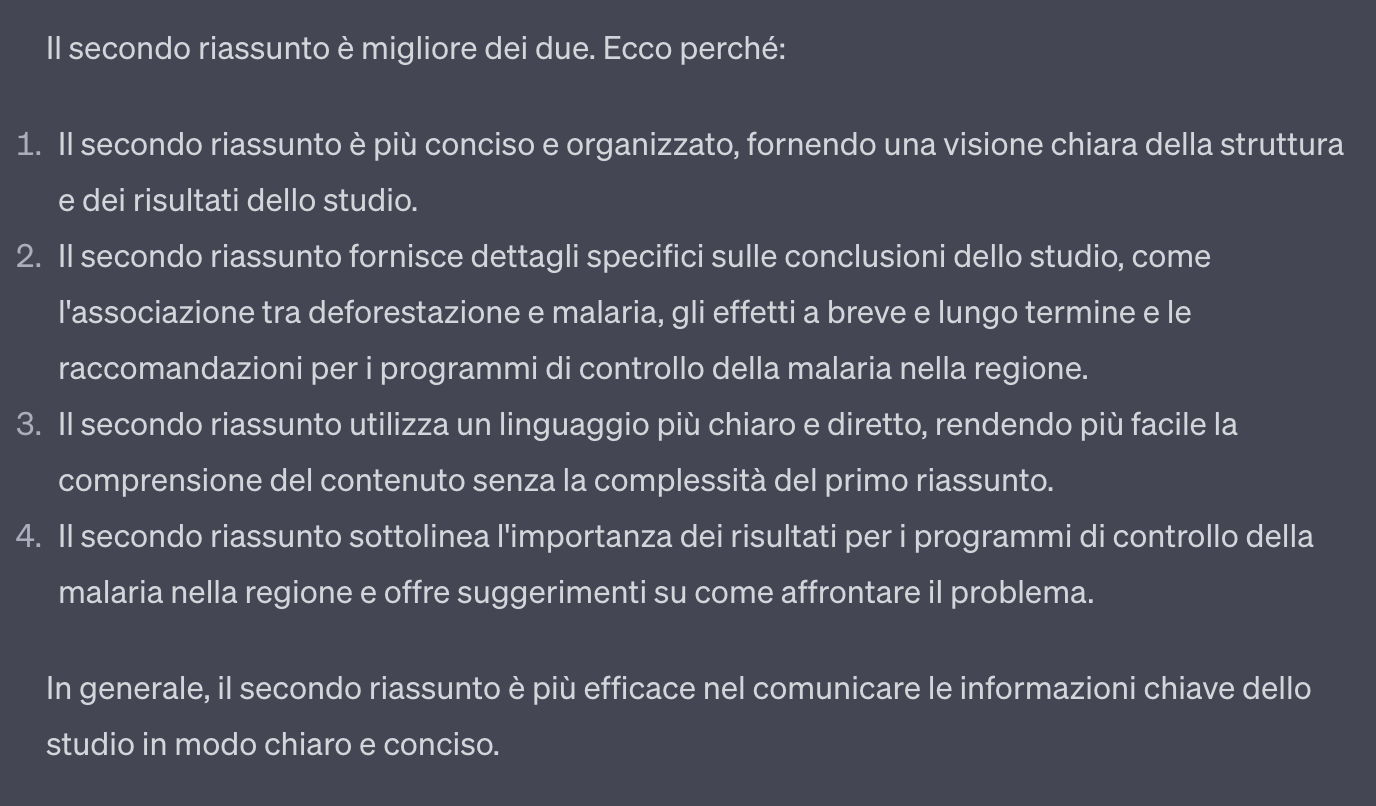

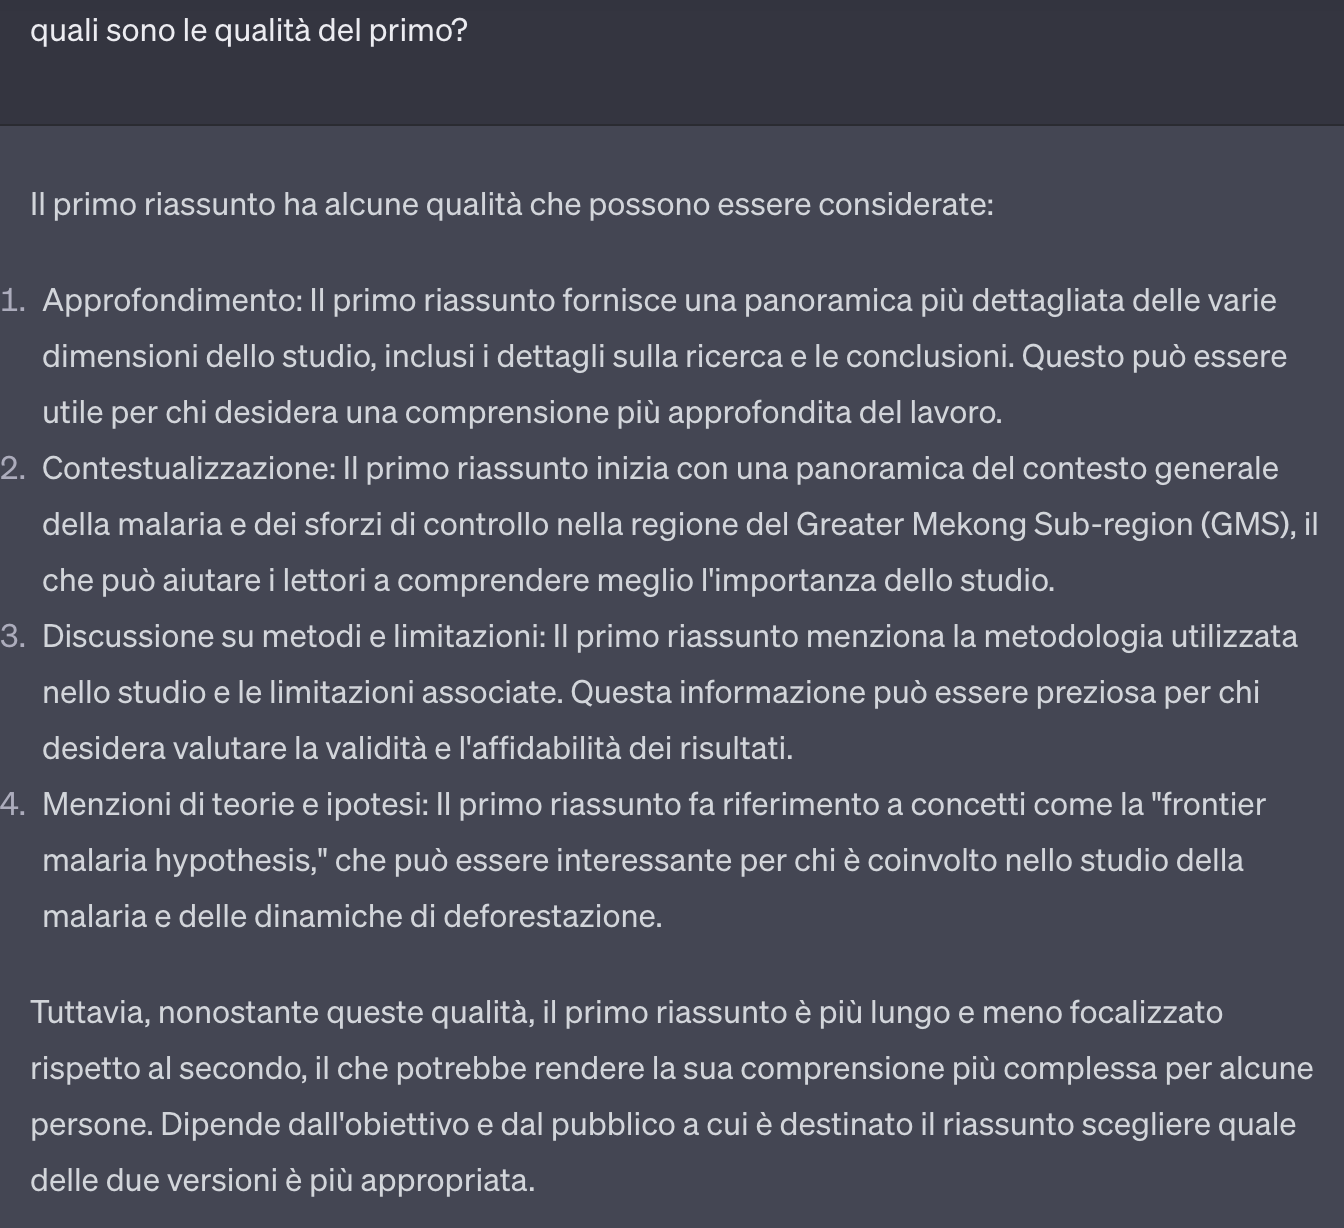

# **MULTINEWS**

In [ ]:
memsum_multinews = MemSum(  "/content/drive/MyDrive/checkpoints/multi_news/model_batch_620.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

In [ ]:
test = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/multi_news/test300.json") ]


In [ ]:
test[0]

{'text': ["CANTON, Massachusetts (Reuters) - Republican presidential challenger Mitt Romney's testimony from a 1991 court hearing related to the founder of Staples Inc appeared to contain little likely to damage the candidate's chances in the November 6 general election.The 192-page filing, released with a Massachusetts court's approval on Thursday, shows that the retailer, prior to its initial public offering, issued a new class of shares to help fund Staples founder Thomas Stemberg's divorce from Maureen Sullivan Stemberg.The Norfolk Probate & Family Court in Canton, Massachusetts, south of Boston, on Thursday approved the release of hundreds of pages of testimony Romney delivered at a hearing on Thomas Stemberg's divorce from Sullivan Stemberg, at the Boston Globe newspaper's request.The office-supplies retailer - in which Bain Capital, a private equity fund that Romney worked for before entering politics, was an early investor - had privately sold a new class of shares to facilitat

In [ ]:
extSum,gptSum=custom_pipeline(test[0]['text'], memsum_multinews, 10, 350)

In [ ]:
extSum

['"It was something which was done in my opinion, it was initiated as a favor.',
 '"Out of context, it is essentially meaningless to the public, and she can put it in context," Allred said, referring to her client.Romney provided testimony in 1991 on behalf of Stemberg, who was battling a post-divorce lawsuit.Sullivan Stemberg has disputed Romney\'s description of the value of the company, according to a filmmaker who interviewed her.A spokesman for Thomas Stemberg said he was pleased that the judge had upheld the order preventing him or his ex-wife from discussing the case.',
 '"We are delighted that the court has upheld the confidentiality order in this case, which has nothing to do with Governor Romney," said George Regan, a spokesman for Stemberg.',
 "CANTON, Massachusetts (Reuters) - Republican presidential challenger Mitt Romney's testimony from a 1991 court hearing related to the founder of Staples Inc appeared to contain little likely to damage the candidate's chances in the No

In [ ]:
gptSum

"The statements in question pertain to a court hearing in 1991 involving Mitt Romney and the founder of Staples Inc, Thomas Stemberg, who was going through a divorce with Maureen Sullivan Stemberg. Romney provided testimony in support of Stemberg, claiming that the issuance of new shares by Staples was done to assist in the divorce settlement. However, Sullivan Stemberg and her attorney, Gloria Allred, disputed Romney's characterization of the value of the company. A judge upheld a confidentiality order preventing both Stemberg and his ex-wife from discussing the case. The release of Romney's testimony, approved by the court, showed that Staples had issued a new class of shares to fund the divorce settlement. These shares could be converted to common stock and were different from previously sold shares. Romney's lawyer did not object to the testimony being made public, stating that it was a private family matter. The Boston Globe argued that the public has a right to know the contents 

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

"The release of Mitt Romney's 1991 testimony in a court hearing related to the founder of Staples Inc is unlikely to damage his chances in the upcoming US presidential election. The 192-page filing shows that Staples issued a new class of shares to help fund the founder's divorce. Bain Capital, the private equity fund Romney worked for before entering politics, was an early investor in Staples. Romney testified that the shares were issued as a favour so that the founder could reach a settlement with his wife. The shares at issue could be converted to common stock, unlike earlier shares sold in three prior rounds of fundraising, which held greater voting rights, according to Romney."

In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 180 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(test[0]['text'], 200)

**COSA NE PENSA GPT?**

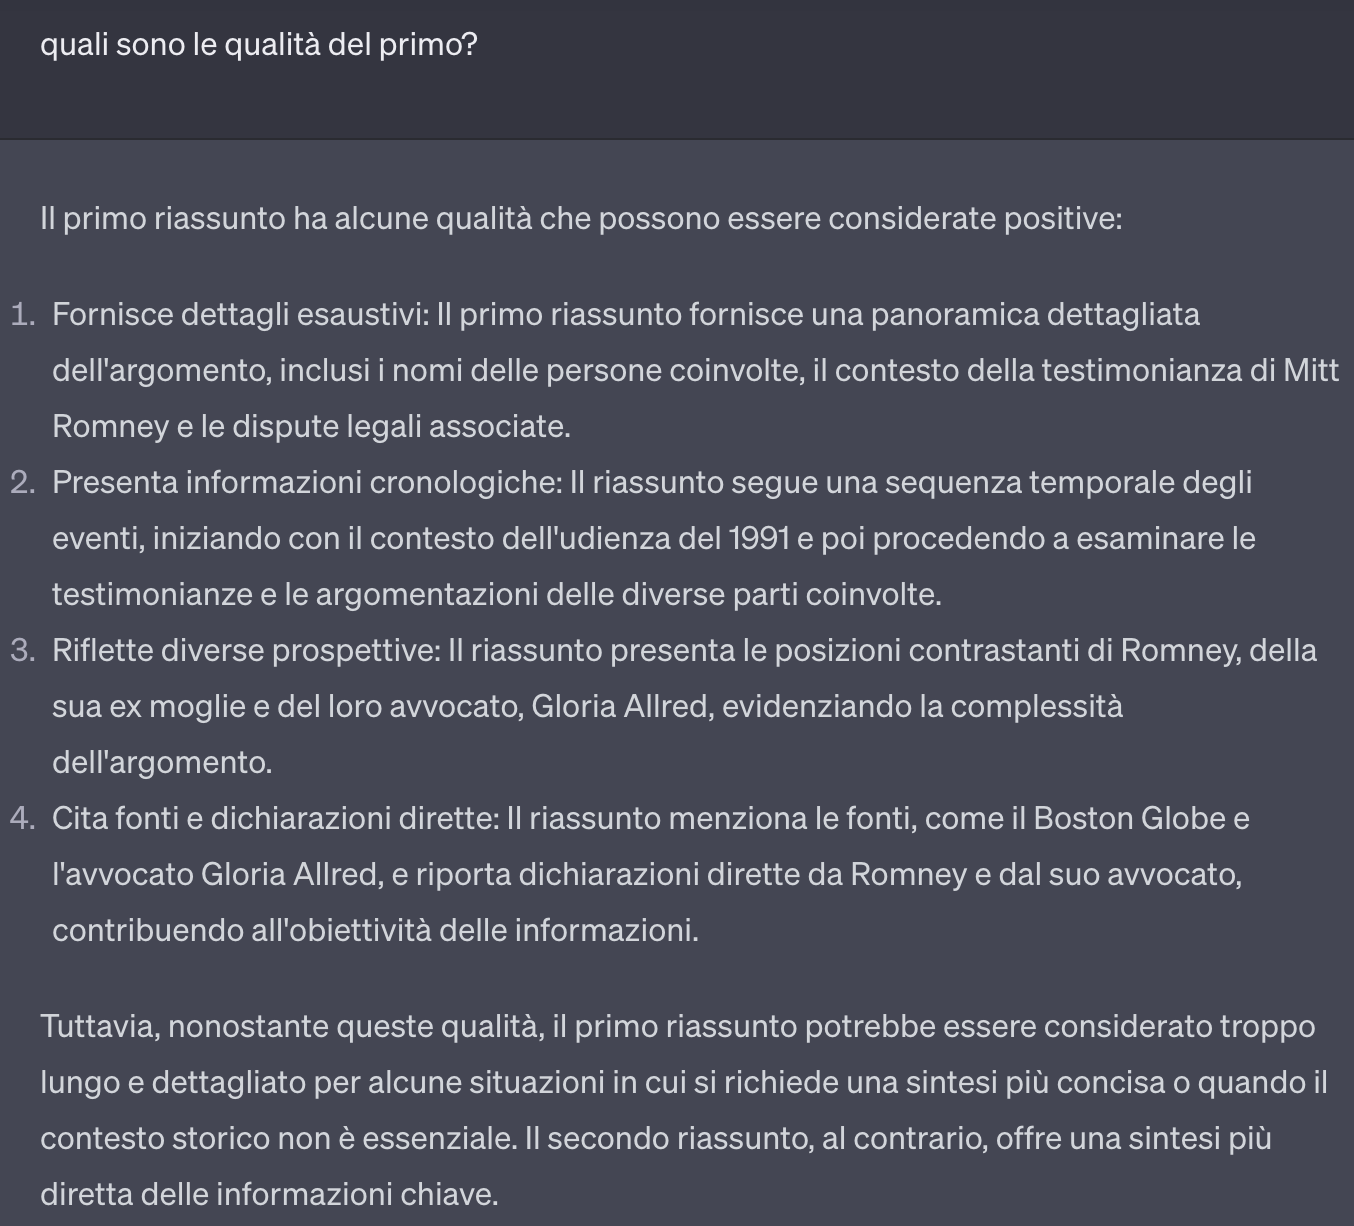

# **BIGPATENT**

In [ ]:
memsum_bigpatent = MemSum(  "/content/drive/MyDrive/checkpoints/big_patent/model_batch_620.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

In [ ]:
test = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/big_patent/test300.json") ]


In [ ]:
test[0]

{'text': ['FIELD OF THE DISCLOSURE \n     The disclosure generally relates to the field of surface sterilization, and more particularly, to sterilization of electronic devices using ultraviolet light.',
  'BACKGROUND \n     One of the most common places to find infectious bacteria and viruses is the keyboard, second to the only the phone.',
  'Surprisingly work station desks contain the highest traces of the following bacteria and viruses: Bacteriophage ( E. Coli ), Infectious Hepatitis, Influenza,  Staphylococcus Aureus  (MRSA), Streptococcus (Strep Throat),  Shigella Flexneri  (Dysentary), Pinkeye (Viral &amp; Bacterial),  Salmonella Typhosa  (Typhoid Fever),  Leptospira  (Jaundice), and  Corynebacterium  (Family causes Strep, Meningitis, Scarlet Fever).',
  'Sterilization of electronic device is often performed by spraying chemicals directly on to the surface of the device and allowed to dry for 15 to 20 minutes.',
  'The most notable side effects from such sterilization are a stick

In [ ]:
extSum,gptSum=custom_pipeline(test[0]['text'], memsum_bigpatent, 5, 300)

In [ ]:
extSum

['A method for sterilizing an electronic device is also disclosed.',
 'The method includes providing a UV radiation source and a distribution fiber coupled to the UV radiation source for transmitting UV radiation to an output end of said distribution fiber, where at least one of the UV radiation source and the distribution fiber are integrated into a structure of an electronic device; and outputting UV radiation from said output end of said distribution fiber onto a surface of said electronic device to sterilize said surface.',
 'The system may include a UV radiation source and a distribution fiber coupled to the UV radiation source for transmitting UV radiation to an output end of said distribution fiber.',
 'At least one of the UV radiation source and the distribution fiber can be integrated into a structure of an electronic device such that UV radiation output from said output end of said distribution fiber impinges on a surface of said electronic device to sterilize said surface.',

In [ ]:
gptSum

'The present disclosure relates to a method and system for sterilizing electronic devices using ultraviolet (UV) radiation. The method involves incorporating a UV radiation source and a distribution fiber into the structure of an electronic device. The distribution fiber is connected to the UV radiation source and transmits the UV radiation to an output end. The UV radiation is then emitted from the output end onto the surface of the electronic device, effectively sterilizing the surface. The system includes a UV radiation source and a distribution fiber that are integrated into the structure of the electronic device. The UV radiation source transmits the UV radiation through the distribution fiber to the output end, where it is directed onto the surface of the electronic device for sterilization purposes. Overall, this disclosure presents a novel approach to sterilizing electronic devices using integrated UV radiation sources and distribution fibers.'

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

'The document describes a technique for sterilizing electronic devices using ultraviolet germicidal irradiation (UVGI). The method involves using a miniature UV light source combined with UV-passing fiber optics to transmit the UV light to the surface of the devices. The system includes software for scheduling sterilization routines and ensuring user safety through controlled levels of UV radiation. The arrangement can be integrated into various electronic devices and provides a convenient and efficient solution for surface sterilization without the use of chemicals or continuous user action. The document also discusses the potential market for auto-sterilizing electronic devices and the importance of maintaining a sterile work environment to prevent the spread of bacteria and viruses. Overall, the disclosed technique offers a simple and effective solution for sterilizing electronic devices in various environments.'

In [ ]:
import time

def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 400 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(5)
  return res

In [ ]:
res=gen_abs_summary(test[0]['text'], 400)

In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 150 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 200)

# **WIKISUM**

In [ ]:
memsum_wikisum = MemSum(  "/content/drive/MyDrive/checkpoints/wiki_sum/model_batch_62.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

In [ ]:
test = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/wiki_sum/test300.json") ]


In [ ]:
test[0]

{'text': ['Remove the cap.',
  'The cap is a small covering located over the mouthpiece of the inhaler to prevent foreign objects from getting in the inhaler.',
  'Pull the cap to remove it and set it in a safe place.',
  'An uncapped inhaler can pick up germs and debris, which you will then pump into your lungs.',
  "Make sure that you don't lose your cap while you're using your inhaler.",
  'Inspect the inhaler.',
  'The inhaler should be clean, especially the mouthpiece.',
  'Remove the cap and check the inside and outside of the mouthpiece.',
  'Check the expiration date to make sure that it can still be used.',
  'Wipe any grime or debris off the inhaler with a dry tissue or cotton swab.',
  'If the mouthpiece is dirty, wipe it down with rubbing alcohol, and let it dry.',
  'Hold the inhaler upright and shake it 5-10 times.',
  'Hold the inhaler in your hand with your index finger on top of the canister.',
  'The mouthpiece should be on the bottom with the top of the canister poin

In [ ]:
extSum,gptSum=custom_pipeline(test[0]['text'], memsum_wikisum, 18,500)

In [ ]:
extSum

['Wipe any grime or debris off the inhaler with a dry tissue or cotton swab.',
 "If you're using a spacer, some spacers have a whistle on them.",
 'Keep your dry powder inhaler (DPI) dry.',
 'Depending on whether you have a rocket or a diskus, how you load the inhaler will differ.',
 "To prevent your medicine from clumping, don't store your DPI in the bathroom or in an area without air conditioning.",
 "Don't worry about wasting medicine because an unprimed inhaler will not provide you a full dose, putting your breathing at risk.",
 'Only press the canister down once.',
 'The medicine is already in the inhaler, but with a DPI you must release it into the delivery chamber before you can use it.',
 'This will release a dose of your medicine.',
 'Place the inhaler or the inhaler with the spacer in your mouth.',
 "If you're still having trouble, then check with the directions for your model because DPIs vary more in how they're used compared with other inhalers.",
 'Load your dose of medic

In [ ]:
gptSum

'The process of preparing and using a dry powder inhaler (DPI) involves several steps and considerations. Before using the inhaler, it is important to ensure that it is free from any dirt or particles by wiping it with a dry tissue or cotton swab. If a spacer is being used, it is worth noting that some spacers may be equipped with a whistle. It is crucial to keep the DPI dry to maintain its effectiveness.\n\nThe loading process of the inhaler will depend on whether it is a rocket or a diskus type. It is important to load the inhaler correctly to ensure proper delivery of the medication. To prevent the medicine from clumping, it is advised not to store the DPI in the bathroom or any area lacking air conditioning.\n\nIt is essential to understand that using an unprimed inhaler will not provide the full dose of medicine, putting your breathing at risk. Therefore, it is crucial to press the canister down only once. Although the medicine is already in the inhaler, with a DPI, it must be rel

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

'This document provides instructions on how to properly use an inhaler for medication delivery. It emphasizes the importance of removing the cap and inspecting the inhaler for cleanliness and expiration date. The document recommends wiping any grime or debris off the inhaler and using rubbing alcohol to clean the mouthpiece if necessary. It also advises shaking the inhaler and priming it before use to ensure a full dose is delivered. \n\nIf using a spacer, the document suggests checking for any grime or debris inside and clearing it out if necessary. The spacer should be washed with mild dish detergent and air-dried before reassembling. \n\nThe document provides step-by-step instructions for inhaling the medication, including the correct positioning of the mouthpiece and the breathing technique. It emphasizes the importance of holding the breath for at least ten seconds to allow the medication to work effectively. After exhaling, users are advised to rinse their mouth with water to pre

In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 300 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(test[0]['text'], 350)

# **BOOKSUM**

In [ ]:
memsum_booksum = MemSum(  "/content/drive/MyDrive/checkpoints/book_sum/model_batch_62.pt",
                  "/content/model/word_embedding/vocabulary_200dim.pkl",
                  gpu = 0 ,  max_doc_len = 500  )

In [ ]:
test = [ json.loads(line) for line in open("/content/drive/MyDrive/DATASETS/book_sum/test300.json") ]


In [ ]:
test[0]

{'text': ['\nAll states, all powers, that have held and hold rule over men have been\nand are either republics or principalities.',
  'Principalities are either hereditary, in which the family has been long\nestablished; or they are new.',
  'The new are either entirely new, as was Milan to Francesco Sforza, or\nthey are, as it were, members annexed to the hereditary state of the\nprince who has acquired them, as was the kingdom of Naples to that of\nthe King of Spain.',
  'Such dominions thus acquired are either accustomed to live under a\nprince, or to live in freedom; and are acquired either by the arms of\nthe prince himself, or of others, or else by fortune or by ability.',
  'I will leave out all discussion on republics, inasmuch as in another\nplace I have written of them at length, and will address myself only to\nprincipalities.',
  'In doing so I will keep to the order indicated above,\nand discuss how such principalities are to be ruled and preserved.',
  'I say at once ther

In [ ]:
extSum,gptSum=custom_pipeline(test[0]['text'], memsum_booksum, 22,400)

In [ ]:
extSum

['\nAll states, all powers, that have held and hold rule over men have been\nand are either republics or principalities.',
 '(*) Louis XII, King of France, "The Father of the People,"\n     born 1462, died 1515.',
 '(+) Charles VIII, King of France, born 1470, died 1498.',
 '(*) Louis XII divorced his wife, Jeanne, daughter of Louis\n     XI, and married in 1499 Anne of Brittany, widow of Charles\n     VIII, in order to retain the Duchy of Brittany for the\n     crown.',
 'Born 1460, died 1510.',
 "He was Georges d'Amboise,\n     created a cardinal by Alexander VI.",
 'Nevertheless Milan was taken from France both the first and the second\ntime.',
 'Principalities are either hereditary, in which the family has been long\nestablished; or they are new.',
 'He ruled over Milan\n     from 1494 to 1500, and died in 1510.',
 'And in fact it has been seen that the greatness of the Church\nand of Spain in Italy has been caused by France, and her ruin may be\nattributed to them.',
 'The new are

In [ ]:
gptSum

"The passage discusses the nature of states and powers, asserting that they are either republics or principalities. It provides historical information about various rulers, such as Louis XII and Charles VIII of France, and their actions. It highlights Louis XII's divorce and remarriage to Anne of Brittany, as well as his rule over Milan and his alliance with the Venetians. The passage also discusses the influence of France, the Church, and Spain in Italy, and attributes the ruin of Italy to them. It distinguishes between hereditary principalities and new ones, emphasizing the importance of settling and sending colonies in the latter. The passage analyzes the errors made by Louis XII and the difficulties faced by new rulers. It cites the example of the Duke of Ferrara, who successfully defended his dominions due to his established position. The passage concludes by discussing the burden imposed by new rulers on their subjects and the consequences of their actions, using the example of L

**ESTRAZIONE DIRETTA GPT DA DOCUMENTO ORIGINALE (vedi sotto come)**

In [ ]:
resFinale

"The document discusses the challenges of ruling both hereditary and new states, using examples to support its arguments. It distinguishes between hereditary states, which are easier to maintain, and new states, which are more difficult to control. The document also discusses the acquisition and maintenance of new territories, highlighting the importance of treating the conquered people well or crushing them to prevent revenge. It emphasizes the importance of foreseeing and addressing future troubles to maintain power. The document also criticizes King Louis XII of France for not following the necessary steps to maintain control of a diverse state in Italy, pointing out his mistakes and their consequences. However, the specific consequences of Louis' actions in Italy are not further elaborated upon in the document. Overall, the document provides insights into the challenges and strategies involved in ruling different types of states."

In [ ]:
import openai
import time

def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)
  parts=len(input_text)//4000
  res=["" for i in range(parts)]

  for i in range(parts):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Summarize the following document in less than 250 words:"},
            {"role": "user", "content": input_text[4000*i:4000*(i+1)]}
        ],
        max_tokens=max_tokens,
        temperature=0.7,  #creatività del modello
        api_key="sk-",
    )
    res[i]=response.choices[0].message["content"].strip()
    time.sleep(3)
  return res

In [ ]:
res=gen_abs_summary(test[0]['text'], 250)

In [ ]:
import pickle

with open('/content/drive/MyDrive/checkpoints/book_sum/summaryParzialiGPT.pkl', 'wb') as file:
    pickle.dump(res, file)


In [ ]:
def gen_abs_summary(input_text, max_tokens):

  input_text = " ".join(input_text)

  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Summarize the following document in less than 200 words:"},
          {"role": "user", "content": input_text}
      ],
      max_tokens=max_tokens,
      temperature=0.7,  #creatività del modello
      api_key="sk-",
  )
  return response.choices[0].message["content"].strip()

In [ ]:
resFinale=gen_abs_summary(res, 250)